# Task 1

## For each bill compute the number of the amendments present in the bill

In [1]:
#import of all the necessary libraries 
import regex as re
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload() #importing tar file

Saving ustawy.tar.gz to ustawy.tar.gz


In [ ]:
# open file
tar = tarfile.open('ustawy.tar.gz')
  
# extracting file
tar.extractall('/content')
bills = [tarinfo.name for tarinfo in tar]  
bills[0]
tar.close()

### Defining helpful functions

In [ ]:
def get_year(file):
  with open(file, 'r') as file:
    my_file = file.read()
    get_year = r'(?<=z\s+dnia\s+\d+\s+\w+\s+)\d+'
    getting_year = re.findall(get_year, my_file, re.IGNORECASE)[0]
    return getting_year



def count_amendments(file):
  with open(file, 'r') as file:
    my_file = file.read()
    pattern_a = r'(Dodaje\ssię\s(ust\.|pkt|art\.|lit\.|rozdział))'
    occurances_a = re.findall(pattern_a, my_file, re.IGNORECASE)
    addition = len(occurances_a)

    pattern_r = r'((ust\.|pkt|art\.|lit\.)\s\d+\w?\sskreśla\ssię(\.|\;|\,))|(skreśla\ssię|Uchyla\ssię)(:|\s(ust\.|pkt|art\.|lit\.|rozdział))'
    occurances_r = re.findall(pattern_r, my_file, re.IGNORECASE)
    removal = len(occurances_r)

    pattern_c = r'(ust\.|pkt|art\.|lit\.)\s\d+\w?\sotrzymuje\sbrzmienie'
    occurances_c = re.findall(pattern_c, my_file, re.IGNORECASE)
    change = len(occurances_c)

  return (addition, removal, change)



def count_bills(file):
  with open(file, 'r') as file:
    my_file = file.read()
    inflexion = ['ustawa',	'ustawy', 'ustawy',	'ustaw', 'ustawie',	'ustawom', 'ustawę',	'ustawy', 'ustawą',	'ustawami', 'ustawie', 'ustawach', 'ustawo', 'ustawy']

    pattern_1 = r'\bustaw\p{L}*\b'
    occurances_u = re.findall(pattern_1, my_file, re.IGNORECASE)
    occurances_u_full = [u for u in occurances_u if u.lower() in inflexion]
    bill = len(occurances_u_full)

    pattern_2 = r'\b(ustaw\p{L}*)\b(?=\sz\sdnia)'
    occurances_zdu = re.findall(pattern_2, my_file, re.IGNORECASE)
    occurances_zdu_full = [u for u in occurances_zdu if u.lower() in inflexion]
    zdu = len(occurances_zdu_full)

    pattern_3 = r'\b(ustaw\p{L}*)\b(?!\sz\sdnia)\b'
    occurances_bez = re.findall(pattern_3, my_file, re.IGNORECASE)
    occurances_bzdu_full = [u for u in occurances_bez if u.lower() in inflexion]
    bzdu = len(occurances_bzdu_full)

    pattern_4 = r'\b(?<!o\szmianie\s)\b(ustaw\p{L}*)\b'
    occurances_oz = re.findall(pattern_4, my_file, re.IGNORECASE)
    occurances_oz_full = [u for u in occurances_oz if u.lower() in inflexion]
    oz = len(occurances_oz_full)

    return (bill, zdu, bzdu, oz)

## Main body to count the occurrences of needed words

In [ ]:
amendments_by_year = {}
bill_counts = {'ustawa':0, 'z dnia':0, 'bez z dnia': 0, 'o zmianie':0}

for i,j in enumerate(bills):
  if i == 154: # incorrect file
      pass
  else:
    bill = count_bills(j)
    bill_counts['ustawa'] += bill[0]
    bill_counts['z dnia'] += bill[1]
    bill_counts['bez z dnia'] += bill[2]
    bill_counts['o zmianie'] += bill[3]

    year = get_year(j)
    amendments = count_amendments(j)

    if year in amendments_by_year.keys():
      amendments_by_year[year]['addition'] += amendments[0]
      amendments_by_year[year]['removal'] += amendments[1]
      amendments_by_year[year]['change'] += amendments[2]
    else: 
      amendments_by_year[year] = {}

      amendments_by_year[year]['addition'] = amendments[0]
      amendments_by_year[year]['removal'] =  amendments[1]
      amendments_by_year[year]['change'] = amendments[2]

amendments_by_year

{'1993': {'addition': 34, 'removal': 8, 'change': 59},
 '1994': {'addition': 81, 'removal': 35, 'change': 72},
 '2000': {'addition': 863, 'removal': 331, 'change': 1295},
 '1998': {'addition': 475, 'removal': 241, 'change': 790},
 '1999': {'addition': 196, 'removal': 65, 'change': 191},
 '1995': {'addition': 254, 'removal': 85, 'change': 319},
 '2001': {'addition': 1147, 'removal': 341, 'change': 1299},
 '1997': {'addition': 396, 'removal': 167, 'change': 628},
 '1996': {'addition': 256, 'removal': 133, 'change': 407},
 '2011': {'addition': 47, 'removal': 18, 'change': 73},
 '2006': {'addition': 65, 'removal': 27, 'change': 120},
 '2012': {'addition': 47, 'removal': 16, 'change': 34},
 '2016': {'addition': 54, 'removal': 17, 'change': 65},
 '2008': {'addition': 38, 'removal': 20, 'change': 75},
 '2002': {'addition': 13, 'removal': 2, 'change': 28},
 '2013': {'addition': 180, 'removal': 18, 'change': 170},
 '2007': {'addition': 315, 'removal': 76, 'change': 462},
 '2003': {'addition': 2

In [ ]:
bill_counts

{'ustawa': 24934, 'z dnia': 7516, 'bez z dnia': 17418, 'o zmianie': 24082}

## Plotting results showing how the percentage of amendments of a given type changed in the consecutive years

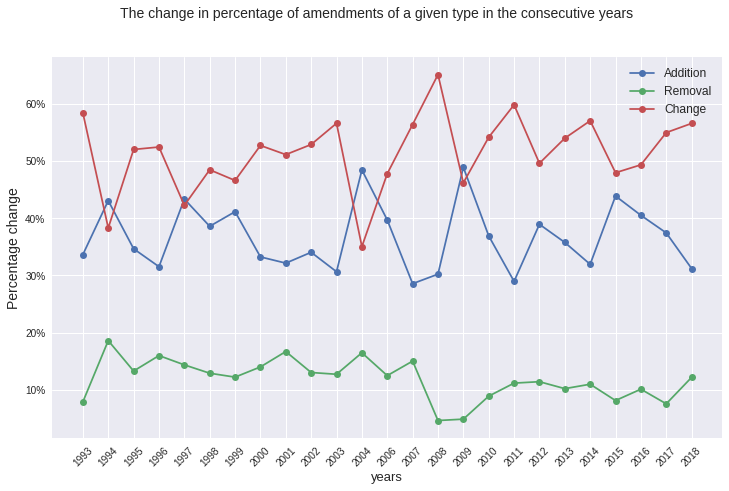

In [ ]:
total_amendmends = [amendments_by_year[year]['addition'] + amendments_by_year[year]['removal'] + amendments_by_year[year]['change'] for year in amendments_by_year.keys()]
percentage_addition = [amendments_by_year[year]['addition']/total_amendmends[i] *100 for i,year in enumerate(amendments_by_year.keys())]
percentage_removal = [amendments_by_year[year]['removal']/total_amendmends[i] *100 for i,year in enumerate(amendments_by_year.keys())]
percentage_change = [amendments_by_year[year]['change']/total_amendmends[i] *100 for i,year in enumerate(amendments_by_year.keys())]
years = sorted(amendments_by_year)


f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.style.use('seaborn')
plt.plot(years,percentage_addition, label = 'Addition', marker ='o')
plt.plot(years,percentage_removal, label = 'Removal', marker='o')
plt.plot(years,percentage_change, label = 'Change', marker = 'o')
plt.yticks([10,20,30,40,50,60], ['10%', '20%', '30%', '40%', '50%', '60%'])
plt.suptitle('The change in percentage of amendments of a given type in the consecutive years', fontsize=14)
plt.xlabel('years', fontsize = 13)
plt.ylabel('Percentage change', fontsize = 14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)

plt.show()

## Plotting results of counting the number of occurrences of the word "Ustawa" by a specific condition.

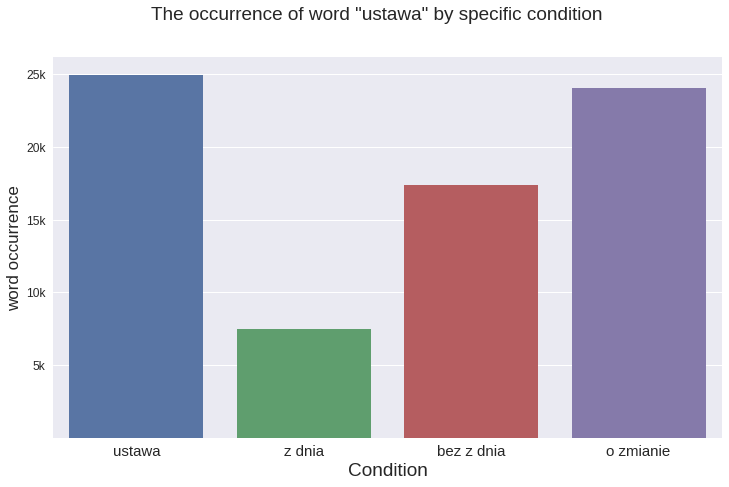

In [ ]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
sns.barplot(x = list(bill_counts.keys()), y = list(bill_counts.values()))
plt.xticks(fontsize=15)
plt.yticks([5000,10000,15000,20000,25000], ['5k', '10k', '15k', '20k', '25k'], fontsize=12)
plt.suptitle('The occurrence of word \"ustawa\" by specific condition', fontsize=19)
plt.xlabel('Condition', fontsize = 19)
plt.ylabel('word occurrence', fontsize = 17)
plt.show()